# Singular Value Descomposition (SVD)

Ya estamos por aprender el tercer algoritmo de **Aprendizaje No Supervisado**, que se llama ***Singular Value Decomposition***, o en español ***Descomposición de Valores ingulares***, pero qué es más fácil de recordar como **SVD**.

### ¿Qué es el SVD?

La ***Descomposición en Valores Singulares*** es un método que se utiliza, al igual que el **PCA**, para reducir la dimensionalidad y para la compresión de datos, con la particularidad de poder extraer sus características.

Vamos a usar la siguiente fórmula para comprender su razonamiento, pero no te asustes porque esto no es algo que necesites comprender ni recordar, sino que por ahora solo quiero que lo veas para saber qué es lo que ocurre tras la cortina.


### Fórmula base
![](FormulaSVD.png)


Esta fórmula nos dice que lo que hace **SVD** es tomar una matriz (*A*) y descomponerla en tres nuevas matrices específicas: 
+ *U*
+ *Σ* (sigma)
+ *VT* (V Transpuesta)
	
¿Qué significa cada una de ellas? Bueno, te lo voy a mostrar aquí con un ejemplo super diminuto, pero insisto, si no eres matemático no es necesario que te lo busques aprender. Solo quiero darle a tu mente una imagen en la que apoyarse, y nada más. Esto es como abrir el capó del coche y mirar el motor, pero tranquilo que podrás conducir el coche sin necesidad de saber qué ocurre dentro del motor.


### Ejemplo
![](a.png)![](u.png)![](sigma.png)![](vt.png)

Vamos a descomponer este ejemplo:

+ *A* es la matriz original, y tiene dimensiones `m` y `n` (estas letras son la forma convencional de decir *número de filas* y *número de columnas*, respectivamente). Esta que vemos aquí es una matriz de 2x2 que vamos a usar de ejemplo.

Entonces lo primero que va a hacer **SVD** es tomar a esa matriz *A* y descomponerla en **3 nuevas matrices** muy especiales:
+ *U* es una matriz ortogonal, que también es de dimensiones `m` y `n`. Que sea ortogonal significa que tiene una característica especial: si la giras (es decir, si la transpones) y luego la multiplicas por la versión original, el resultado es igual al punto de partida, donde solo la diagonal tiene valor, y todos los demás son ceros. En la imagen he puesto para el ejemplo, estás viendo cómo sería la matriz *U* extraída de la matriz *A*.
+ *Σ* (que se pronuncia *sigma*) es una matriz diagonal de dimensiones `m` y `n`, con los valores singulares de *A* en la diagonal. Los valores singulares son las raíces cuadradas de los valores propios, ya sea de *A*, de *A transpuesta*, o de *A* x *A Transpuesta*, y están ordenados de mayor a menor. Este concepto es algo que te juro que ni yo entiendo, y si eres matemático, seguro que estás disfrutando mucho de esta tortura. Yo solamente te muestro que estos números no salen al azar.
+ *VT* (que se pronuncia *V Transpuesta*) es *V* pero girada (o transpuesta, que es el término correcto). ¿Y qué es *V*? Es una matriz ortogonal de dimensiones `m` y `n`, que contiene los vectores propios de *AT* x *A*.


**Pero Fede, ¿por qué me muestras todo esto si ni siquiera tu lo entiendes del todo?**

Porque si bien no es necesario que sepas hacer estos cálculos ni que entiendas al dedillo lo que está ocurriendo detrás de la cortina. Lo que quiero que sepas aquí es que lo que hace este algoritmo es crear estas matrices para descomponer y reorganizar la información de una manera que nos va a permitir ver las partes más importantes de los datos. Es como si tuviéramos un montón de piezas de un rompecabezas y este algoritmo nos ayudara a encontrar cuáles piezas son las más cruciales para entender la imagen completa, permitiéndonos reconstruirla de la manera más eficiente posible. En otras palabras, nos ayuda a simplificar y destacar lo más relevante de nuestros datos, haciendo cálculos que no podríamos hacer por nosotros mismos.

Ahora que sabes lo que ocurre en el motor del coche, vamos a conducirlo.

La primera curiosidad es que para hacer **SVD** solamente necesitamos una vieja y conocida librería.

In [1]:
import numpy as np

Esto se debe a que **SVD** además de ser un algoritmo de **aprendizaje no supervisado**, es un algoritmo matemático utilizado para otras aplicaciones, y es por eso que **NumPy** lo dispone: porque NumPy es la librería matemática por excelencia.

Vamos a crear un **array numérico bidimensional** super simple.

In [2]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

Y aplicamos **SVD** en una sola línea.

In [3]:
U, sigma, VT = np.linalg.svd(A)

Y ahora vemos los resultados:

In [4]:
U

array([[-0.2298477 ,  0.88346102,  0.40824829],
       [-0.52474482,  0.24078249, -0.81649658],
       [-0.81964194, -0.40189603,  0.40824829]])

In [5]:
sigma

array([9.52551809, 0.51430058])

In [6]:
VT

array([[-0.61962948, -0.78489445],
       [-0.78489445,  0.61962948]])

Estos serían los resultados finales, porque eso es lo que hace **SVD**: transformar una *matriz inicial* en *3 matrices especiales* a través de su algoritmo.

Aquí podríamos finalizar la lección sobre **SVD** si quisiéramos quedarnos exclusivamente en el terreno matemático, pero ese no es el caso porque a nosotros nos gusta **ver cosas**, así que lo vamos a llevar al terreno estadístico para poder hacer alguna visualización interesante.

Entonces volvamos a aplicar **SVD**, pero esta vez en un dataset concreto, como **iris**.

Para eso vamos a necesitar unas librerías extra (perdón por cargarlas ahora, pero antes quería dejar en claro que **SVD** solo necesita de **NumPy**)

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Y traigamos el dataset **iris**, pero en este caso solo necesitaremos sus características.

In [8]:
iris= load_iris()
X = iris.data

Centramos los datos, como en **PCA**.

In [9]:
X_centrado = X - np.mean(X, axis=0)

En este caso, `X_centrado` va a ser nuestra matriz original *A*. Entonces sobre `X_centrado` aplicamos **SVD**:

In [10]:
U, sigma, VT = np.linalg.svd(X_centrado)

Y solo tomaremos los primeros **2 componentes principales** para la visualización.

In [11]:
k = 2
X_transformado = U[:, :k] * sigma[:k]

Esta línea de código es parte de un proceso en el que se utiliza la **Descomposición en Valores Singulares (SVD)** para reducir la dimensionalidad de un conjunto de datos.

Recuerda que hemos descompuesto la matriz original *A* (que en este caso es `X_centrado`) en tres matrices (`U`, `sigma`, y `VT`)

Ahora la matriz `sigma` contiene los valores singulares, que representan la "importancia" de cada componente principal en la descripción de la variabilidad de los datos. Los componentes principales son nuevas direcciones en el espacio de los datos que capturan la mayor variabilidad posible.

Entonces `k = 2` establece que solo queremos usar los primeros **2 componentes principales**. La razón para elegir solo dos componentes es que queremos visualizar los datos en un espacio bidimensional, al igual que cuando hicimos **PCA**.

Y lo que hemos hecho en la línea `X_transformed = U[:, :k] * sigma[:k]` es transformar los datos originales para adecuarlos al espacio de los componentes principales seleccionados:
+ `U[:, :k]` selecciona las primeras **2 columnas** de `U`, que corresponden a los vectores singulares izquierdos asociados con los 2 valores singulares más grandes. O mejor dicho en castellano: esos vectores singulares izquierdos son simplemente matemáticas complicadas para encontrar las dos "mejores líneas" que capturan la esencia o la forma principal de cómo se distribuyen nuestros puntos en el espacio.
+ `sigma[:k]` selecciona los primeros **2 valores singulares** de `sigma`, que indican la importancia de cada uno de los 2 componentes principales.
+ Y la **multiplicación** se realiza elemento a elemento entre cada columna seleccionada de `U` y el correspondiente valor singular, escalando así las columnas de `U` por la importancia de cada componente principal.
	
En resumen, esta línea transforma los datos originales a un espacio de menor dimensión (en este caso, de dos dimensiones) definido por los **2 componentes principales** más significativos.

Esto nos va a permitir visualizar a continuación los datos de una manera que facilita la interpretación de patrones o de agrupaciones dentro del conjunto de datos.

In [12]:
especies = ["setosa", "versicolor", "virginica"]

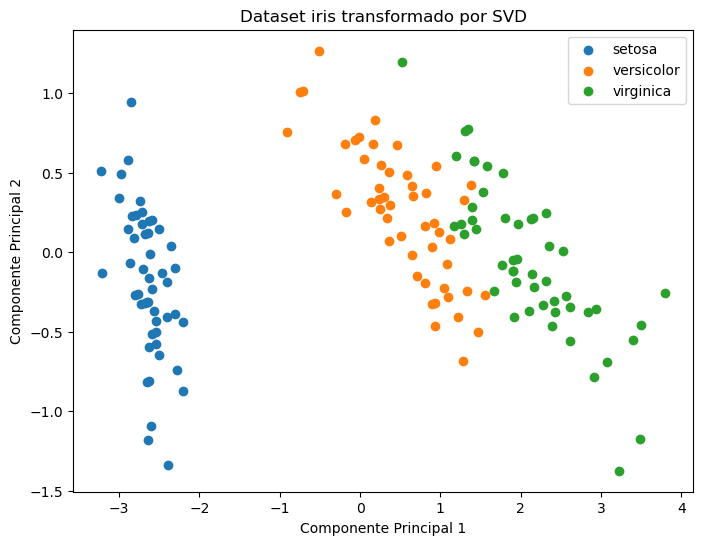

In [13]:
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_transformado[iris.target == i, 0],
               X_transformado[iris.target == i, 1],
               label=especies[i])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.title('Dataset iris transformado por SVD');

Esta visualización es como si hubiéramos tomado todas las flores de Iris, con todas sus cuatro diferentes medidas, y las hubiéramos dibujado en un mapa simplificado para ver cómo se agrupan.

Gracias a **SVD** encontramos las **dos direcciones principales** que nos ayudan a ver las diferencias más grandes entre las flores, y luego, dibujamos cada flor en este nuevo mapa usando solamente esas dos direcciones.

En el mapa, las flores se representan con puntos, y hemos coloreado los puntos según su especie, para que sea fácil ver si ciertos tipos de flores tienden a estar cerca unos de otros o si tienen características similares, y claramente podemos observar que eso es así.

Como puedes ver, este resultado es muy similar al que obtuvimos con **PCA**, y esto se debe a que ambos métodos hacen más o menos lo mismo: reducir la dimensionalidad y encontrar las direcciones principales que agrupan a nuestros elementos.

Es hora de avanzar, y lo haremos en la siguiente lección.